In [ ]:
#Importamos las librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
#Carga y Separacion de documentos
df=pd.read_csv('2_DS_creditos.csv', sep=";")

In [ ]:
df.shape

(150000, 12)

In [ ]:
df.columns

Index(['ID', 'Default', 'Prct_uso_tc', 'Nro_prestao_retrasados',
       'Mto_ingreso_mensual', 'Nro_prod_financieros_deuda',
       'Nro_retraso_60dias', 'Nro_creditos_hipotecarios',
       'Nro_retraso_ultm3anios', 'Nro_dependiente', 'Prct_deuda_vs_ingresos',
       'Edad_Grupo', 'Edad', 'Ing_Men'],
      dtype='object')

In [ ]:
#
df.describe()

,ID,Default,Prct_uso_tc,Nro_prestao_retrasados,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Prct_deuda_vs_ingresos,Edad
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,0.421033,6.671187e+03,8.452760,0.265973,1.018240,0.240387,0.757222,0.454680,51.937860
std,43301.414527,0.249746,249.755371,4.192781,1.340232e+04,5.145951,4.169304,1.129771,4.155179,1.115086,0.338219,14.005235
min,1.000000,0.000000,0.000000,0.000000,-7.714000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,37500.750000,0.000000,0.029867,0.000000,3.120000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.175074,41.000000
50%,75000.500000,0.000000,0.154181,0.000000,5.495000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.366508,52.000000
75%,112500.250000,0.000000,0.559046,0.000000,9.000000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.868254,63.000000
max,150000.000000,1.000000,50708.000000,98.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,0.951184,76.000000


In [ ]:
Mto_ingreso_mensual.describe()

NameError: ignored

Al realizar nuestro analisis sobre los datos que contiene nuestro DF. Hemos observado que la edad maxima contiene valores atipicos por lo que se hace necesario que se la hagan tratamiento de datos. Adicional a eso hemos observado que el Prct_uso_tc esta desbalanceado

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ID                          150000 non-null  int64   
 1   Default                     150000 non-null  int64   
 2   Prct_uso_tc                 150000 non-null  float64 
 3   Nro_prestao_retrasados      150000 non-null  int64   
 4   Mto_ingreso_mensual         150000 non-null  int64   
 5   Nro_prod_financieros_deuda  150000 non-null  int64   
 6   Nro_retraso_60dias          150000 non-null  int64   
 7   Nro_creditos_hipotecarios   150000 non-null  int64   
 8   Nro_retraso_ultm3anios      150000 non-null  int64   
 9   Nro_dependiente             146076 non-null  float64 
 10  Prct_deuda_vs_ingresos      150000 non-null  float64 
 11  Edad_Grupo                  150000 non-null  category
 12  Edad                        150000 non-null  int64   
 13 

In [ ]:
df.columns

Index(['ID', 'Default', 'Prct_uso_tc', 'Nro_prestao_retrasados',
       'Mto_ingreso_mensual', 'Nro_prod_financieros_deuda',
       'Nro_retraso_60dias', 'Nro_creditos_hipotecarios',
       'Nro_retraso_ultm3anios', 'Nro_dependiente', 'Prct_deuda_vs_ingresos',
       'Edad_Grupo', 'Edad', 'Ing_Men'],
      dtype='object')

In [ ]:
column_names = df.columns
#print(column_names)

In [ ]:
#Nuestro target es el default.
df.groupby('Default').size()

Default
0    139974
1     10026
dtype: int64

<Axes: xlabel='Default', ylabel='count'>

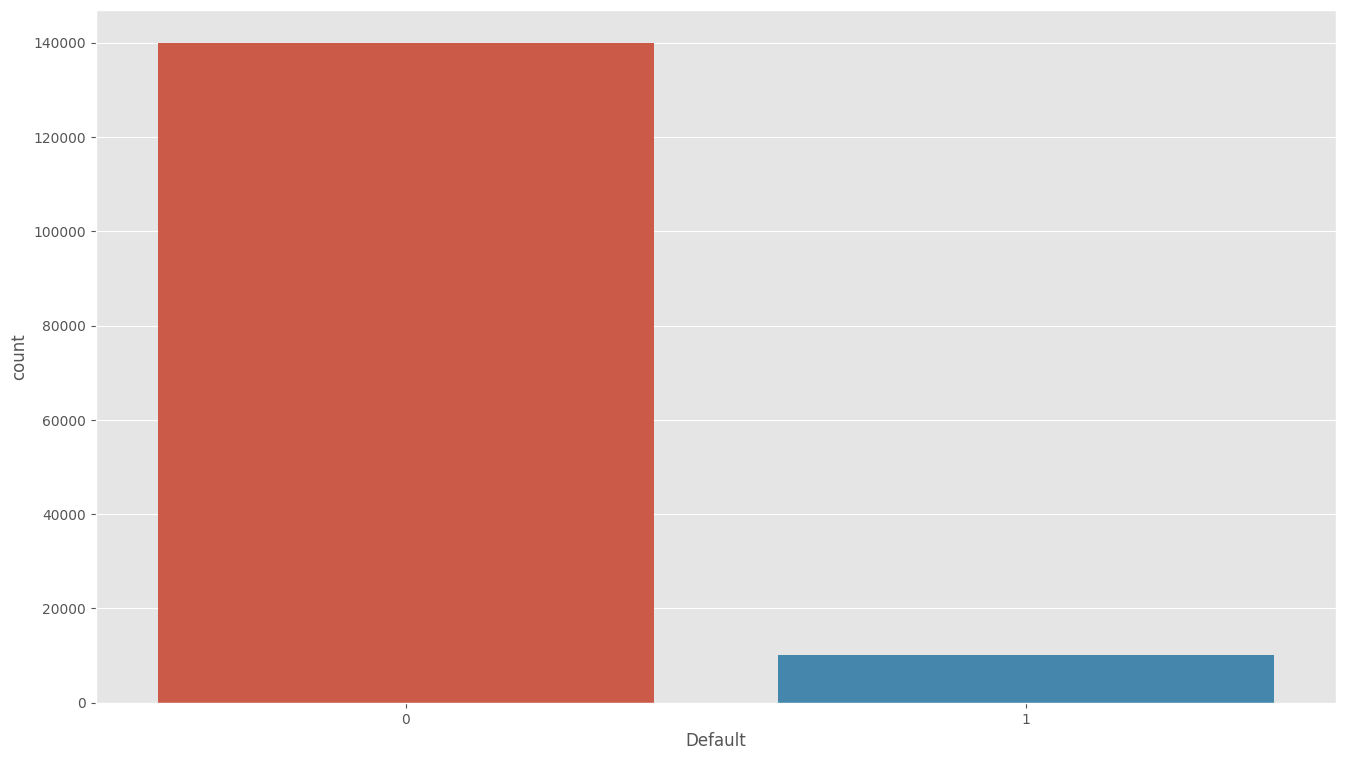

In [ ]:
#sns.factorplot('top',data= df.default,kind="count")
sns.countplot(data = df, x = "Default")
#valor 1 con "verdadero" y el valor 0 con "falso

In [ ]:
df['Edad'].quantile(np.arange(0,1,0.1))

0.0     0.0
0.1    33.0
0.2    39.0
0.3    44.0
0.4    48.0
0.5    52.0
0.6    56.0
0.7    61.0
0.8    65.0
0.9    72.0
Name: Edad, dtype: float64

<ipython-input-16-b864471b2eb8>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(data=conteo_por_grupo, x="Edad_Grupo", y="Edad", ci=None)


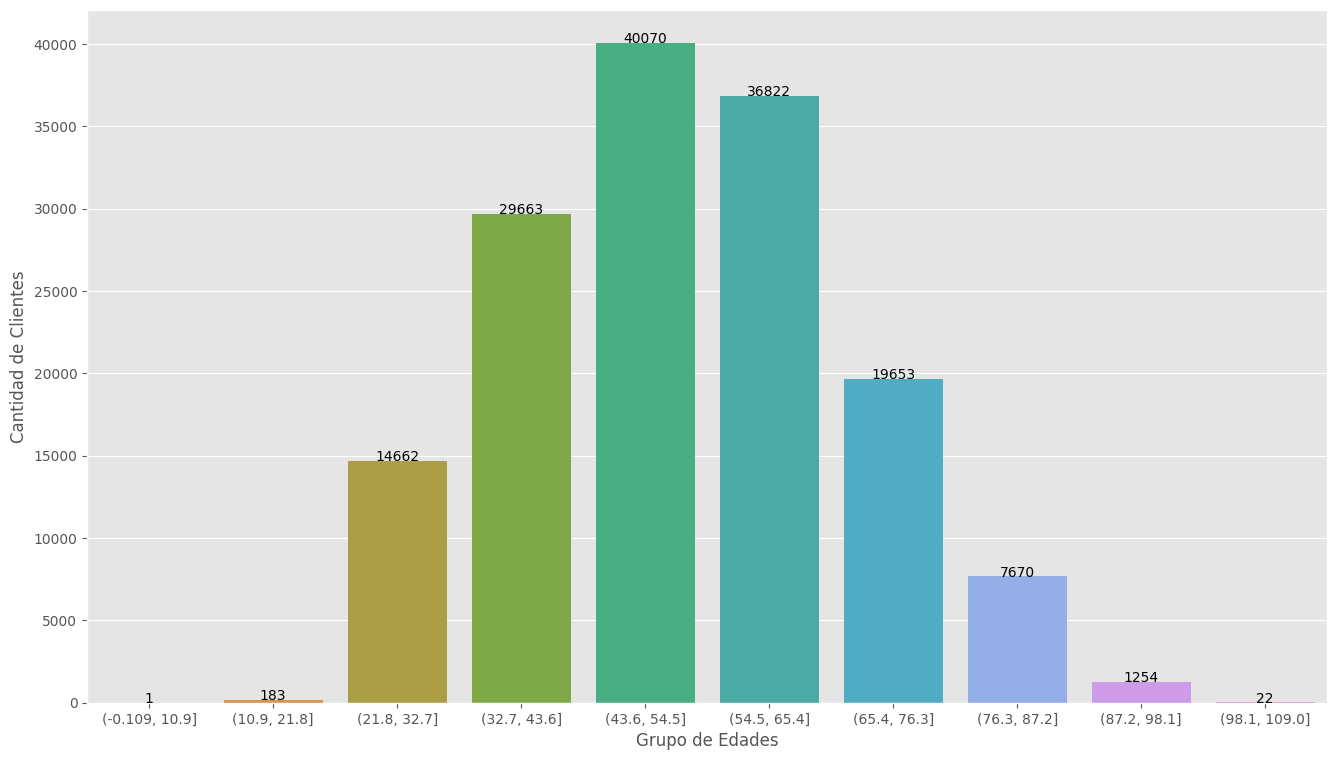

In [ ]:
#En base a esta segmentación de datos podemos deducir que eliminar los outliers sería benficioso para nuestor modelo de datos. dejando solo los datos hasta la edad 87.2
df['Edad_Grupo'] = pd.cut(df['Edad'], bins=10)
conteo_por_grupo = df.groupby('Edad_Grupo').count().reset_index()
plot = sns.barplot(data=conteo_por_grupo, x="Edad_Grupo", y="Edad", ci=None)
plt.xlabel('Grupo de Edades')
plt.ylabel('Cantidad de Clientes')
for index, row in conteo_por_grupo.iterrows():
    plot.text(index, row['Edad'], row['Edad'], color='black', ha="center")

In [ ]:
df['Edad'].quantile(np.arange(0.9,1,0.01))
# Luego de realizar nuestro analisis hemos detectado que existen grupos que han dispersado nuestros datos. Por lo que lo procedemos a capiarlos.
def outlier_capping(x):
    x = x.clip(lower=x.quantile(0.01), upper=x.quantile(0.94))

    return(x)

In [ ]:
Edad_tratada= df[['Edad']].apply(lambda x: outlier_capping(x))

In [ ]:
Edad_tratada.describe()

,Edad
count,150000.000000
mean,51.937860
std,14.005235
min,24.000000
25%,41.000000
50%,52.000000
75%,63.000000
max,76.000000


In [ ]:
df = pd.concat([df.drop(columns=['Edad']), Edad_tratada], axis=1,)

In [ ]:
df['Default'].describe()

count    150000.000000
mean          0.066840
std           0.249746
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Default, dtype: float64

In [ ]:
0#Esto lo hacemos para saber como haremos para tratar los datos que contiene el % de deuda vs ingresos
df['Prct_deuda_vs_ingresos'].quantile(np.arange(0,1,0.1))

0.0    0.000000
0.1    0.030874
0.2    0.133773
0.3    0.213697
0.4    0.287460
0.5    0.366508
0.6    0.467506
0.7    0.649189
0.8    0.951184
0.9    0.951184
Name: Prct_deuda_vs_ingresos, dtype: float64

In [ ]:
df['Prct_deuda_vs_ingresos'].quantile(np.arange(0.7,0.77,0.01))

0.70    0.649189
0.71    0.678073
0.72    0.711772
0.73    0.752078
0.74    0.802954
0.75    0.868254
0.76    0.951175
0.77    0.951184
Name: Prct_deuda_vs_ingresos, dtype: float64

In [ ]:
def outlier_capping(x):
    x = x.clip(lower= x.quantile(0.1), upper=x.quantile(0.76))

    return(x)

In [ ]:
Prct_deuda_vs_ingreso_tratado= df[['Prct_deuda_vs_ingresos']].apply(lambda x: outlier_capping(x))

# Le hicimos un recorte a los valores atipicos para que podamos obtener solo valores por debajo de 1. A traves de los analisis que hemos realizado identificamos que existian valores por 3000 y para el uso de la columna lo adecuado y aceptable eran valores por debajo < 1

In [ ]:
df['Prct_deuda_vs_ingresos'].describe()

count   150000.00
mean         0.46
std          0.34
min          0.03
25%          0.18
50%          0.37
75%          0.87
max          0.95
Name: Prct_deuda_vs_ingresos, dtype: float64

In [ ]:
df = pd.concat([df.drop(columns=['Prct_deuda_vs_ingresos']), Prct_deuda_vs_ingreso_tratado], axis=1,)

In [ ]:
df.head(3)

,ID,Default,Prct_uso_tc,Nro_prestao_retrasados,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Edad_Grupo,Edad,Ing_Men,Prct_deuda_vs_ingresos
0,1,1,0.766127,2,9120,13,0,6,0,2.0,"(43.6, 54.5]",45,"(-10730.464, 293932.4]",0.802982
1,2,0,0.957151,0,2600,4,0,0,0,1.0,"(32.7, 43.6]",40,"(-10730.464, 293932.4]",0.121876
2,3,0,0.658180,1,3042,2,1,0,0,0.0,"(32.7, 43.6]",38,"(-10730.464, 293932.4]",0.085113


In [ ]:
#Verificamos que la columna de
df.isnull().sum().sort_values(ascending=False)

Mto_ingreso_mensual           29731
Nro_dependiente                3924
ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Prct_deuda_vs_ingresos            0
dtype: int64

#Hemos verificado las columnas de Monto de Ingreso mensual para validar que en efecto se encuentran con valores nulos

In [ ]:
df['Mto_ingreso_mensual'].quantile(np.arange(0.06,0.09,0.001))

0.060      0.000
0.061      0.000
0.062      0.000
0.063      0.000
0.064      1.000
0.065      1.000
0.066      1.000
0.067      1.000
0.068      2.000
0.069    100.000
0.070    191.930
0.071    265.000
0.072    333.000
0.073    400.000
0.074    453.926
0.075    500.000
0.076    535.000
0.077    600.000
0.078    625.922
0.079    690.921
0.080    728.000
0.081    764.000
0.082    800.000
0.083    803.917
0.084    820.000
0.085    833.000
0.086    865.000
0.087    900.000
0.088    929.000
0.089    968.000
Name: Mto_ingreso_mensual, dtype: float64

In [ ]:
def outlier_capping(x):
    x = x.clip(lower= x.quantile(0.069))

    return(x)

In [ ]:
Mto_ingreso_mensual_tratado= df[['Mto_ingreso_mensual']].apply(lambda x: outlier_capping(x))
df = pd.concat([df.drop(columns=['Mto_ingreso_mensual']), Mto_ingreso_mensual_tratado], axis=1,)

In [ ]:
df.describe()

,ID,Default,Prct_uso_tc,Nro_prestao_retrasados,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente,Edad,Prct_deuda_vs_ingresos,Mto_ingreso_mensual
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,146076.00,150000.00,150000.00,150000.00
mean,75000.50,0.07,6.05,0.42,8.45,0.27,1.02,0.24,0.76,51.94,0.46,6884.57
std,43301.41,0.25,249.76,4.19,5.15,4.17,1.13,4.16,1.12,14.01,0.34,13253.91
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.03,100.00
25%,37500.75,0.00,0.03,0.00,5.00,0.00,0.00,0.00,0.00,41.00,0.18,3120.00
50%,75000.50,0.00,0.15,0.00,8.00,0.00,1.00,0.00,0.00,52.00,0.37,5495.00
75%,112500.25,0.00,0.56,0.00,11.00,0.00,2.00,0.00,1.00,63.00,0.87,9000.00
max,150000.00,1.00,50708.00,98.00,58.00,98.00,54.00,98.00,20.00,76.00,0.95,3008750.00


In [ ]:
df['Mto_ingreso_mensual'].describe()

count    150000.00
mean       6884.57
std       13253.91
min         100.00
25%        3120.00
50%        5495.00
75%        9000.00
max     3008750.00
Name: Mto_ingreso_mensual, dtype: float64

In [ ]:
Mto_ingreso_mensual_tratado.quantile(np.arange(0,1,0.1))

,Mto_ingreso_mensual
0.00,100.00
0.10,1233.00
0.20,2617.00
0.30,3600.00
0.40,4500.00
0.50,5495.00
0.60,6600.00
0.70,8005.00
0.80,10000.00
0.90,13664.00


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df['Mto_ingreso_mensual'].describe()

count    150000.00
mean       6884.57
std       13253.91
min         100.00
25%        3120.00
50%        5495.00
75%        9000.00
max     3008750.00
Name: Mto_ingreso_mensual, dtype: float64

Considero que el valor de 3 millones no tiene un efecto negativo para nuestro ML a pesar de generar una dispersion.

In [ ]:
ingreso_avg = df['Mto_ingreso_mensual'].mean()
ingreso_std = df['Mto_ingreso_mensual'].std()
ing_null_count = df['Mto_ingreso_mensual'].isnull().sum()
ing_null_random_list = np.random.normal( loc=ingreso_avg,  scale=ingreso_std, size=ing_null_count)
ing_null_random_list = np.maximum(ing_null_random_list, 0)

conValoresNulos = np.isnan(df['Mto_ingreso_mensual'])

df.loc[np.isnan(df['Mto_ingreso_mensual']), 'Mto_ingreso_mensual'] = ing_null_random_list
df['Mto_ingreso_mensual'] = df['Mto_ingreso_mensual'].astype(int)


<ipython-input-155-afa1e8d0c25f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('pearson'),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


<Axes: >

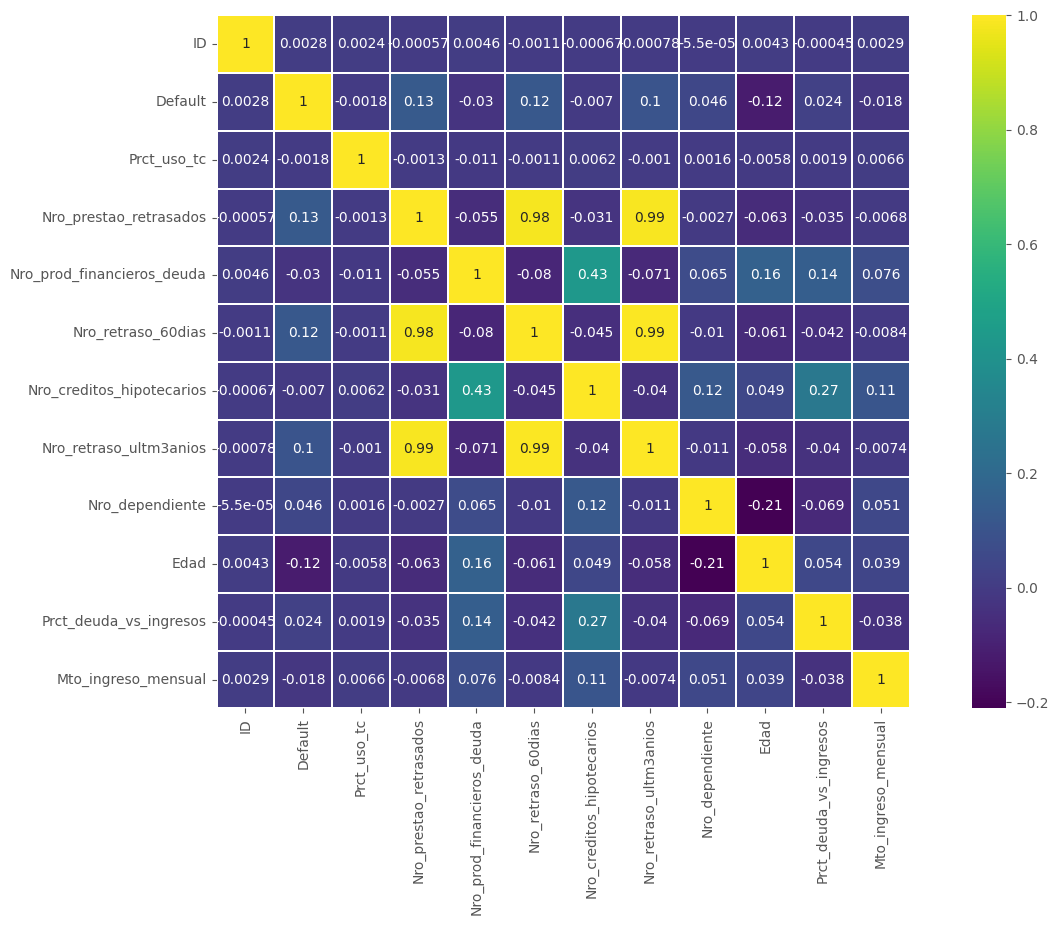

In [ ]:
sns.heatmap(df.corr('pearson'),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
print('Valores faltantes por columna:')
print(df.isnull().sum())

Valores faltantes por columna:
ID                               0
Default                          0
Prct_uso_tc                      0
Nro_prestao_retrasados           0
Nro_prod_financieros_deuda       0
Nro_retraso_60dias               0
Nro_creditos_hipotecarios        0
Nro_retraso_ultm3anios           0
Nro_dependiente               3924
Edad_Grupo                       0
Edad                             0
Ing_Men                          0
Prct_deuda_vs_ingresos           0
Mto_ingreso_mensual              0
dtype: int64


In [ ]:
df['Nro_dependiente'].fillna('2', inplace = True) #eliminación de datos nulos

In [ ]:
print('Valores faltantes por columna:')
print(df.isnull().sum())

Valores faltantes por columna:
ID                            0
Default                       0
Prct_uso_tc                   0
Nro_prestao_retrasados        0
Nro_prod_financieros_deuda    0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
Nro_dependiente               0
Edad_Grupo                    0
Edad                          0
Ing_Men                       0
Prct_deuda_vs_ingresos        0
Mto_ingreso_mensual           0
dtype: int64


Si hay Default: 139974
hay Defaul: 10026
Proporción: 13.96 : 1


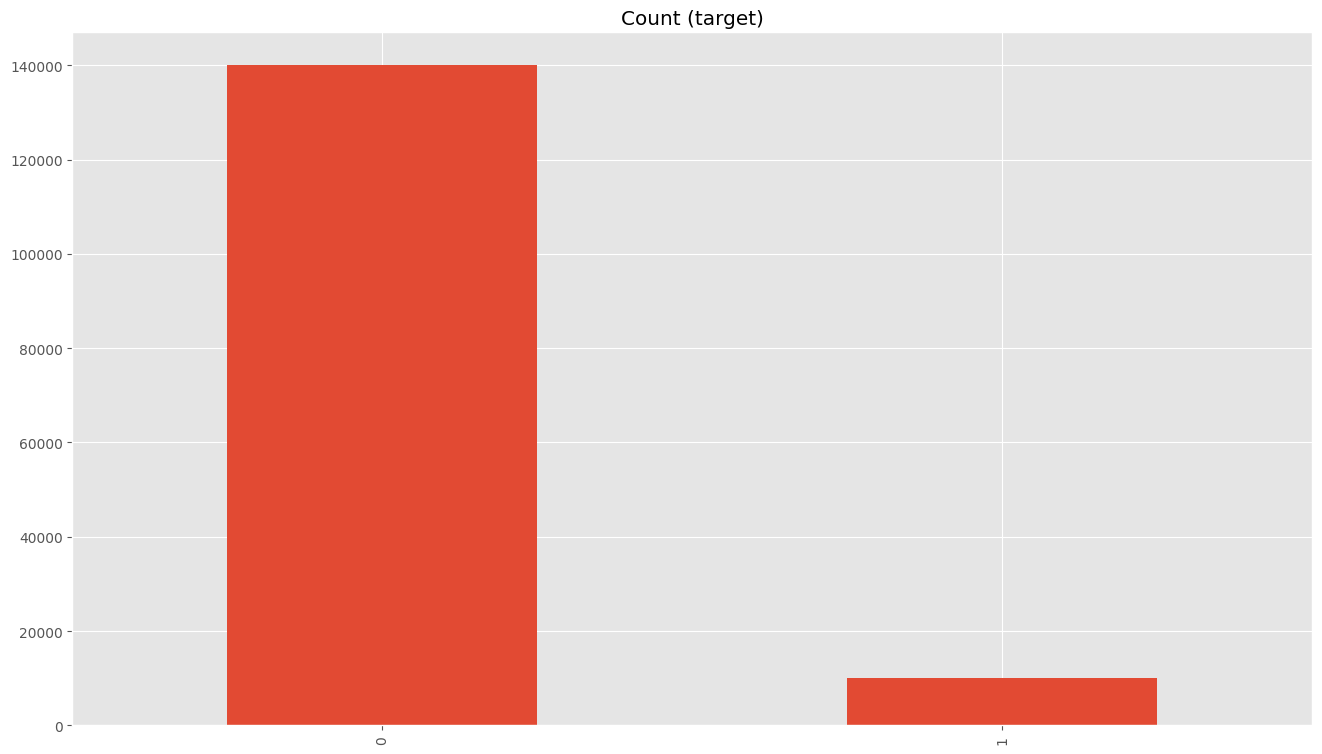

In [ ]:
# Detección del desbalance de la muestras
target_count = df.Default.value_counts()
print('Si hay Default:', target_count[0])
print('hay Defaul:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [ ]:
#Librerías para tratamiento, modelado y evaluación de datos
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = df[['Mto_ingreso_mensual',  'Edad', 'Prct_deuda_vs_ingresos']]
y = df[['Default']]

import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.35,random_state=42)

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
model1 = xgb.XGBClassifier()

In [ ]:
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostClassifier

In [ ]:
model3 = CatBoostClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model4 = RandomForestClassifier()

In [ ]:
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)

In [ ]:
model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
model3.fit(X_train, y_train)

Learning rate set to 0.072818
0:	learn: 0.6110895	total: 95.7ms	remaining: 1m 35s
1:	learn: 0.5421111	total: 142ms	remaining: 1m 10s
2:	learn: 0.4873328	total: 171ms	remaining: 57s
3:	learn: 0.4430162	total: 207ms	remaining: 51.5s
4:	learn: 0.4077112	total: 235ms	remaining: 46.8s
5:	learn: 0.3780847	total: 256ms	remaining: 42.4s
6:	learn: 0.3534200	total: 271ms	remaining: 38.4s
7:	learn: 0.3334571	total: 288ms	remaining: 35.7s
8:	learn: 0.3173258	total: 300ms	remaining: 33.1s
9:	learn: 0.3043334	total: 313ms	remaining: 31s
10:	learn: 0.2930672	total: 333ms	remaining: 29.9s
11:	learn: 0.2840653	total: 346ms	remaining: 28.5s
12:	learn: 0.2761097	total: 360ms	remaining: 27.4s
13:	learn: 0.2698085	total: 374ms	remaining: 26.3s
14:	learn: 0.2647039	total: 389ms	remaining: 25.5s
15:	learn: 0.2601656	total: 403ms	remaining: 24.8s
16:	learn: 0.2563835	total: 417ms	remaining: 24.1s
17:	learn: 0.2532810	total: 432ms	remaining: 23.6s
18:	learn: 0.2506143	total: 448ms	remaining: 23.1s
19:	learn: 0

In [ ]:
model4.fit(X_train, y_train)

<ipython-input-179-e1373b20bd5a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
model5.fit(X_train, y_train)

<ipython-input-180-22bcca698d6e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
# Agregabdo un clasificador de arbol simple
from sklearn.tree import DecisionTreeClassifier

model6 = DecisionTreeClassifier()
model6.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[49047,     0],
       [ 3453,     0]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

array([[49047,     0],
       [ 3453,     0]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred3)

array([[49038,     9],
       [ 3450,     3]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred4)

array([[48372,   675],
       [ 3386,    67]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred5)

array([[49047,     0],
       [ 3453,     0]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred6)

array([[45757,  3290],
       [ 3132,   321]])

In [ ]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     49047
           1       0.09      0.09      0.09      3453

    accuracy                           0.88     52500
   macro avg       0.51      0.51      0.51     52500
weighted avg       0.88      0.88      0.88     52500



In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     49047
           1       0.09      0.02      0.03      3453

    accuracy                           0.92     52500
   macro avg       0.51      0.50      0.50     52500
weighted avg       0.88      0.92      0.90     52500



In [ ]:
dfMl = pd.DataFrame({'algorithm' : ['Arbol de Decision', 'RF'],
                   'precision' : [0.94, 0.93],
                   'recall' : [0.93, 0.92]})

In [ ]:
dfMl

,algorithm,precision,recall
0,Arbol de Decision,0.94,0.93
1,RF,0.93,0.92


In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))
print("Accuracy for model 6: %.2f" % (accuracy_score(y_test, pred6) * 100))

Accuracy for model 4: 92.26
Accuracy for model 6: 87.77


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
importances = model6.feature_importances_

In [ ]:
feature_names = X_train.columns

Text(0.5, 1.0, 'Importancia de las Características en Random Forest')

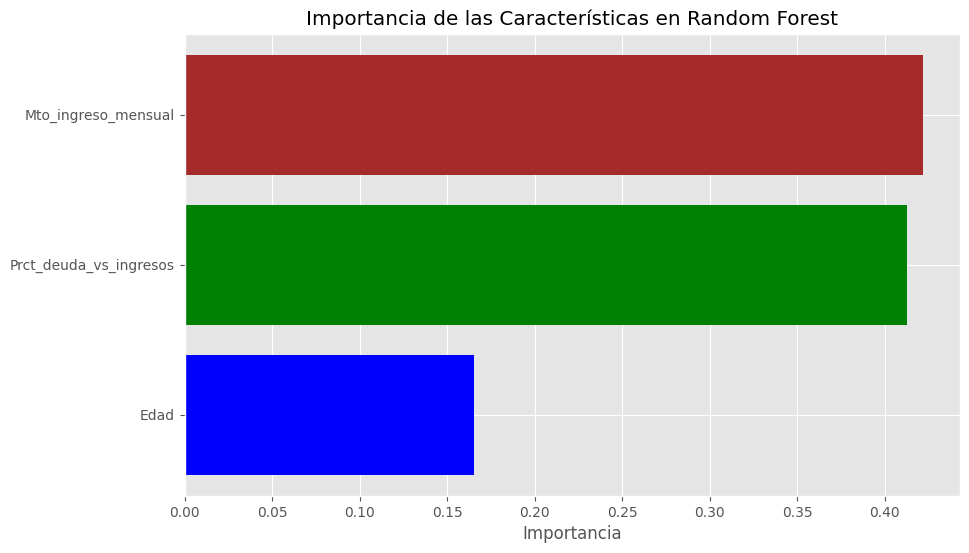

In [ ]:
sorted_idx = np.argsort(importances)
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_importances = [importances[i] for i in sorted_idx]
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(sorted_feature_names))
colors = ['blue', 'green', 'brown']
plt.barh(y_pos, sorted_importances, align='center', color=colors)
plt.yticks(y_pos, sorted_feature_names)
plt.xlabel('Importancia')
plt.title('Importancia de las Características en Random Forest')

En base a nuestro analisis realizado podemos deducir que la importancia de la edad no es un referente para nuestro modelo ni para nuestros datos. Por el contrario nuestras estrategias se deben relacionar a mas con el porcentaje de edeuda vs ingresos de nuestros clientes y el monto de ingreso mensual que perciben al momento de realizar los prestamos.
